<a href="https://colab.research.google.com/github/captain7oxic/Pytorch_practice/blob/main/DeeLearning_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will try to calculate loss as well as implement back-propogation of a neural network using pytorch.

In [1]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py


--2023-06-16 07:00:31--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
#importing the data
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [4]:
#define a Transform to Normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5)),])

In [5]:
#collecting all the data and running the normalization on entire data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform = transform)

In [6]:
#defining the batchsize and shuffling the data in the loader
loader  = torch.utils.data.DataLoader(trainset,batch_size = 64,shuffle = True)

In [7]:
#creating a feed-forward Neural Network

Net = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

In [8]:
#define our loss
loss = nn.CrossEntropyLoss()

There are many loss functions
(1)**Regression Loss Functions**
Mean Squared Error Loss

Mean Squared Logarithmic Error Loss

Mean Absolute Error Loss *italicized text*

(2)**Binary Classification Loss Functions**

Binary Cross-Entropy

Hinge Loss

Squared Hinge Loss *italicized text*

(3)**Multi-Class Classification Loss Functions**

Multi-Class Cross-Entropy Loss

Sparse Multiclass Cross-Entropy Loss

Kullback Leibler Divergence Loss *italicized text*

In [9]:
#iterate over the data
data_iter = iter(loader)

images,labels = next(data_iter)

In [10]:
#flatten the images
images = images.view(images.shape[0],-1)

In [11]:
# Forward pass, get our logits
logits = Net(images)

In [12]:
total_loss=loss(logits,labels)
print(total_loss)

tensor(2.3001, grad_fn=<NllLossBackward0>)


Exercise: Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss. Note that for nn.LogSoftmax and F.log_softmax you'll need to set the dim keyword argument appropriately. dim=0 calculates softmax across the rows, so each column sums to 1, while dim=1 calculates across the columns so each row sums to 1. Think about what you want the output to be and choose dim appropriately.

In [13]:
from torch.nn.modules.activation import LogSoftmax
# TODO: Build a feed-forward network
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)

# TODO: Define the loss
criterion = nn.NLLLoss()

### Run this to check your work
# Get our data
dataiter = iter(loader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3188, grad_fn=<NllLossBackward0>)


clearly the loss is reduced in this example , now we will try to use AutoGrad . Autograd typically stores the trace of calculations happening over the tensor , which helps to make the chained derivatives calculations faster.

In [14]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-0.2801,  0.0701],
        [ 0.4115, -0.7776]], requires_grad=True)


In [15]:
y = x**2
print(y)

tensor([[0.0784, 0.0049],
        [0.1693, 0.6047]], grad_fn=<PowBackward0>)


In [16]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [17]:
z= y.mean()

In [18]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.1400,  0.0350],
        [ 0.2058, -0.3888]])
tensor([[-0.1400,  0.0350],
        [ 0.2058, -0.3888]], grad_fn=<DivBackward0>)


In [19]:
#now lets use Autograd and Loss functions together

In [20]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()

dataiter = iter(loader)
images, labels = next(dataiter)
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits,labels)

In [21]:
loss

tensor(2.3036, grad_fn=<NllLossBackward0>)

In [22]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0030,  0.0030,  0.0030,  ...,  0.0030,  0.0030,  0.0030],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


For The garnish we have the Optim package of the pytorch library to enable Gradient descent calculations on the network.

In [23]:
from torch import optim

In [24]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [25]:
print('Initial weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[ 0.0179,  0.0143,  0.0338,  ..., -0.0165, -0.0240,  0.0092],
        [ 0.0103, -0.0148,  0.0197,  ..., -0.0108,  0.0155, -0.0209],
        [-0.0139,  0.0081,  0.0344,  ..., -0.0253, -0.0107, -0.0061],
        ...,
        [ 0.0210, -0.0138,  0.0352,  ...,  0.0061,  0.0063,  0.0173],
        [ 0.0147, -0.0035,  0.0229,  ..., -0.0002,  0.0223, -0.0139],
        [ 0.0285,  0.0159, -0.0350,  ...,  0.0329, -0.0131, -0.0216]],
       requires_grad=True)


In [26]:
dataiter = iter(loader)
images,labels = next(dataiter)
images = images.resize(64,784)


# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

output =  model(images)
loss = criterion(output,labels)
loss.backward()
print('gradient - ', model[0].weight.grad)

gradient -  tensor([[-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [27]:
# Take an update step and view the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0179,  0.0143,  0.0338,  ..., -0.0165, -0.0240,  0.0092],
        [ 0.0103, -0.0148,  0.0197,  ..., -0.0108,  0.0155, -0.0209],
        [-0.0139,  0.0081,  0.0344,  ..., -0.0254, -0.0108, -0.0061],
        ...,
        [ 0.0210, -0.0138,  0.0352,  ...,  0.0061,  0.0063,  0.0173],
        [ 0.0147, -0.0035,  0.0229,  ..., -0.0002,  0.0223, -0.0139],
        [ 0.0285,  0.0159, -0.0350,  ...,  0.0329, -0.0131, -0.0216]],
       requires_grad=True)


Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch.

In [28]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(),lr=0.3)
epochs = 5

for e in range(epochs):
  running_loss = 0
  for images,labels in loader:
  #flatten
    images = images.view(images.shape[0],-1)

    #remove accumulated gradients
    optimizer.zero_grad()


    #loss
    output = model(images)
    loss= criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
          print(f"Training loss: {running_loss/len(loader)}")

Training loss: 1.8224720779512482
Training loss: 0.9748743534850668
Training loss: 0.6002745570054949
Training loss: 0.5268741858634614
Training loss: 0.6233894656747897


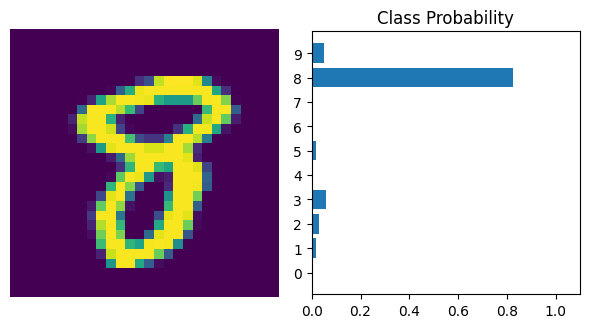

In [31]:
%matplotlib inline
import helper

images, labels = next(iter(loader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)